In [1]:
import json
import numpy as np
import pandas as pd
from pathlib import Path
import argparse

In [2]:
def preprocess(data_name):
  src_list, dst_list, ts_list = [], [], []

  with open(data_name) as f:
    for idx, line in enumerate(f):
      e = line.strip().split(' ')
      src = int(e[0])
      dst = int(e[1])

      ts = float(e[2])

      src_list.append(src)
      dst_list.append(dst)
      ts_list.append(ts)

  return pd.DataFrame({'src': src_list,
                       'dst': dst_list,
                       'ts': ts_list})

In [3]:
data_name = "sx-stackoverflow"
PATH = './data/{}.txt'.format(data_name)
OUT_DF = './data/ml_{}.csv'.format(data_name)

#df = preprocess(PATH)

In [4]:
df = pd.read_csv('./data/ml_{}.csv'.format(data_name))

In [5]:
df

,Unnamed: 0,src,dst,ts
0,0,9,8,1.217568e+09
1,1,1,1,1.217574e+09
2,2,13,1,1.217606e+09
3,3,17,1,1.217618e+09
4,4,48,2,1.217618e+09
...,...,...,...,...
63497045,63497045,4049257,3816212,1.457273e+09
63497046,63497046,3507137,1801524,1.457273e+09
63497047,63497047,144088,275047,1.457273e+09
63497048,63497048,5617035,4368648,1.457273e+09


In [6]:
df_group = df.groupby('dst').agg({'ts':lambda x: list(x)})
df_group

,ts
dst,
1,"[1217573801.0, 1217606247.0, 1217617639.0, 121..."
2,"[1217618182.0, 1217625055.0, 1217714233.0, 121..."
3,"[1226725170.0, 1231933265.0, 1231937597.0, 123..."
4,"[1221494273.0, 1221906984.0, 1221908021.0, 122..."
5,"[1218160607.0, 1218160858.0, 1218160865.0, 121..."
...,...
6024256,"[1457266570.0, 1457266693.0, 1457266782.0]"
6024257,"[1457271570.0, 1457272980.0]"
6024258,"[1457266362.0, 1457266678.0, 1457266762.0, 145..."


In [7]:
df_group['diff'] = df_group.apply(lambda row: np.diff(sorted(row['ts'])), axis=1)

Text(0.5, 1.0, 'Time difference between single dest node')

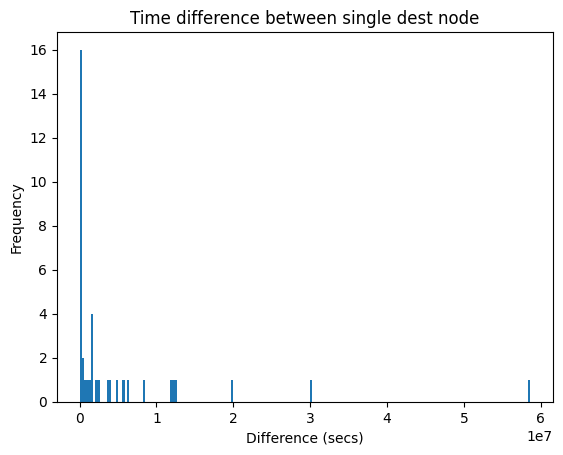

In [9]:
import matplotlib.pyplot as plt
plt.hist(df_group['diff'].iloc[1], bins=200)
plt.xlabel("Difference (secs)")
plt.ylabel("Frequency")
plt.title("Time difference between single dest node")

In [10]:
all = np.hstack(df_group['diff'])

In [11]:
# Filter out time different greater than 2 weeks
filter_arr = all[all < 1209600]
len(filter_arr)

In [13]:
len(all)

61200384

In [24]:
counts, bin_edges = np.histogram(filter_arr, bins=4000)
print(counts)
print(bin_edges)

[58607140   695455   357559 ...        1        0        1]
[0.000000e+00 2.159000e+00 4.318000e+00 ... 8.631682e+03 8.633841e+03
 8.636000e+03]


In [38]:
df_describe = pd.DataFrame(all)
df_describe.describe()

,0
count,6.120038e+07
mean,3.813114e+00
std,6.408714e+02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.975180e+06


Text(0.5, 1.0, 'Time difference between interaction of destination nodes')

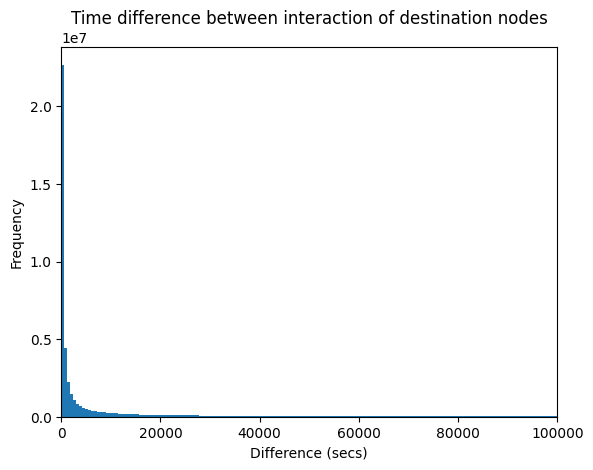

In [15]:
plt.hist(filter_arr, bins=2000)
plt.xlim(0,100000)
plt.xlabel("Difference (secs)")
plt.ylabel("Frequency")
plt.title("Time difference between interaction of destination nodes")

Text(0.5, 1.0, 'Time difference between interaction in 1000 destination nodes')

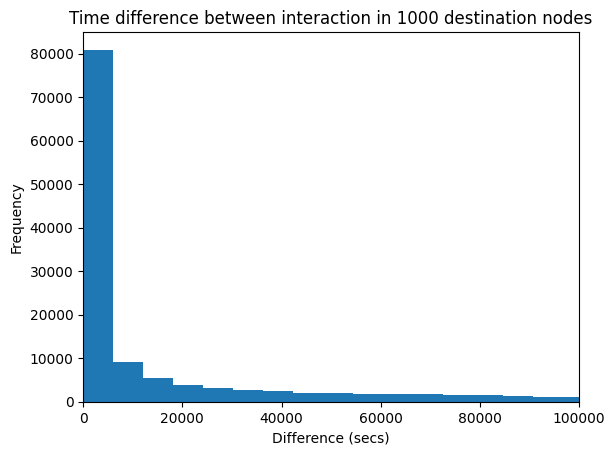

In [42]:
all_10k = np.hstack(df_group['diff'].loc[:1000])
all_10k = all_10k[all_10k < 1209600]
plt.hist(all_10k, bins=200)
plt.xlim(0,100000)
plt.xlabel("Difference (secs)")
plt.ylabel("Frequency")
plt.title("Time difference between interaction in 1000 destination nodes")


In [28]:
len(all_10k)

186552

In [27]:
df_group['diff'].loc[:1000]

dst
1       [32446.0, 11392.0, 600.0, 34133.0, 231074.0, 1...
2       [6873.0, 89178.0, 140848.0, 335.0, 1764.0, 365...
3       [957426.0, 10159.0, 143352.0, 140805.0, 403749...
4       [1693079.0, 423374.0, 91914.0, 122454.0, 19834...
5       [251.0, 7.0, 55.0, 680679.0, 277971.0, 151.0, ...
                              ...                        
996     [265.0, 371.0, 461.0, 540.0, 296151.0, 2126.0,...
997     [2242.0, 1195905.0, 877.0, 670.0, 2928791.0, 9...
998     [616.0, 2351.0, 65842.0, 598.0, 2382.0, 116832...
999     [7390.0, 623.0, 2390458.0, 564.0, 164487.0, 78...
1000    [242.0, 1.0, 4033.0, 4376.0, 544.0, 79385.0, 3...
Name: diff, Length: 727, dtype: object